# Import Packages and Data set

In [1]:
# EDA - Data Cleaning
import pandas as pd
import numpy as np
import missingno
from collections import Counter
import math

# EDA - Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline
import statsmodels.api as stats
from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

#Modeling
from sklearn import (datasets,
                     metrics,
                     model_selection as skms,
                     naive_bayes,
                     neighbors)

from sklearn.linear_model import (LogisticRegression,
                                 SGDClassifier)

from sklearn.model_selection import (cross_val_score,
                                     cross_val_predict,
                                     train_test_split,
                                     GridSearchCV)
from sklearn.preprocessing import RobustScaler

from sklearn.metrics import (accuracy_score,
                             precision_score,
                             recall_score,
                             confusion_matrix,
                             f1_score,
                             roc_curve,
                             auc,
                             classification_report,
                             precision_recall_curve)

from sklearn.ensemble import (RandomForestClassifier,
                              AdaBoostClassifier,
                              ExtraTreesClassifier,
                              GradientBoostingClassifier)
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import RidgeClassifierCV 

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# logistic regression model
import statsmodels.api as sm 

pd.set_option('display.max_rows', 90)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

pd.options.display.float_format = '{:.2f}'.format

# Define Functions

In [2]:
def test_train_summary(X_train, y_train):

    print('\nTraining Dataset - Before Synthetic Minority Oversampling Technique (SMOTE): ')
    print('   Number  of Companies sued:               {:6,.0f}'.format(sum(y_train['suitflag'])))
    print('   Number of Companies not sued:            {:6,.0f}'.format(len(y_train)-sum(y_train['suitflag'])))
    print('   Total Companies:                         {:6,.0f}'.format(len(y_train)))
    print('   Percent of Companies who Filed Suit:    {:6,.0f}%'.format(sum(y_train['suitflag'])/len(y_train)*100))
    print('   Columns and Row count Review: ')
    print('      Column count:                         {:6,.0f}'.format(len(x.columns)))
    print('      Column-to-Row ratio:                 {:6,.0f}%'.format(len(x.columns)/len(y_train)*100)+'\n')
    
    print('Training Dataset - After SMOTE: ')
    print('   Training Dataset - Overview: ')
    print('   Number  of Companies sued (Increase):    {:6,.0f}'.format(sum(y_train_smote['suitflag'])))
    print('   Number of Companies not sued:            {:6,.0f}'.format(len(y_train_smote)-sum(y_train_smote['suitflag'])))
    print('   Percent of Companies who Filed Suit:    {:6,.0f}%'.format(sum(y_train_smote['suitflag'])/len(y_train_smote)*100))
    print('   Columns and Row count Review: ')
    print('      Column count:                         {:6,.0f}'.format(len(x.columns)))
    print('      Column-to-Row ratio:                 {:6,.0f}%'.format(len(x.columns)/len(y_train)*100)+'\n')
    
    print('Test Dataset - Overview: ')
    print('   Number  of Companies sued:               {:6,.0f}'.format(sum(y_test['suitflag'])))
    print('   Number of Companies not sued:            {:6,.0f}'.format(len(y_test)-sum(y_test['suitflag'])))
    print('   Total Companies:                         {:6,.0f}'.format(len(y_test)))
    print('   Percent of Companies who Filed Suit:    {:6,.0f}%'.format(sum(y_test['suitflag'])/len(y_test)*100))
    

    
    
def model_run(X_train, y_train, model_run, results_review):
    if results_review == 'train':    
        
        accuracy = round(model_run.score(X_test, y_test) * 100, 2)

        prec_score = round(precision_score(y_true = y_train, 
                                           y_pred = model_pred_train)* 100, 2)

        recall = round(recall_score(y_true = y_train, 
                                    y_pred = model_pred_train)* 100, 2)

        f1 = round(f1_score(y_true = y_train, 
                            y_pred = model_pred_train)* 100, 2)

        print('Summary of Modeled Results: ')
        print('   General Accuracy: {:6,.1f}%'.format(accuracy))
        print('   ROC AUC Score:    {:6,.1f}%'.format(metrics.roc_auc_score(y_train, model_pred_train)*100))
        print('   Precision Score:  {:6,.1f}%'.format(prec_score))
        print('   Recall Score:     {:6,.1f}%'.format(recall))
        print('   F1 Score:         {:6,.1f}%'.format(f1)+'\n')


        # The confusion matrix
        sns.set(font_scale = 1.5)
        cm = confusion_matrix(y_train, model_run.predict(X_train))
        f, ax = plt.subplots(figsize=(5,5))
        sns.heatmap(cm, 
                    annot=True, 
                    linewidth=0.7, 
                    linecolor='black', 
                    fmt='g', 
                    ax=ax, 
                    cmap="BuPu")
        plt.xlabel('Suit Prediction')
        plt.ylabel('Suit Actual')
        plt.show()

    else:
        
        accuracy = round(model_run.score(X_test, y_test) * 100, 2)

        prec_score = round(precision_score(y_true = y_test, 
                                           y_pred = model_pred_test)* 100, 2)

        recall = round(recall_score(y_true = y_test, 
                                    y_pred = model_pred_test)* 100, 2)

        f1 = round(f1_score(y_true = y_test, 
                            y_pred = model_pred_test)* 100, 2)

        print('Summary of Modeled Results: ')
        print('   General Accuracy: {:6,.1f}%'.format(accuracy))
        print('   ROC AUC Score:    {:6,.1f}%'.format(metrics.roc_auc_score(y_train, model_pred_train)*100))
        print('   Precision Score:  {:6,.1f}%'.format(prec_score))
        print('   Recall Score:     {:6,.1f}%'.format(recall))
        print('   F1 Score:         {:6,.1f}%'.format(f1)+'\n')


        # The confusion matrix
        sns.set(font_scale = 1.5)
        cm = confusion_matrix(y_test, model_run.predict(X_test))
        f, ax = plt.subplots(figsize=(5,5))
        sns.heatmap(cm, 
                    annot=True, 
                    linewidth=0.7, 
                    linecolor='black', 
                    fmt='g', 
                    ax=ax, 
                    cmap="BuPu")
        plt.xlabel('Suit Prediction')
        plt.ylabel('Suit Actual')
        plt.show()          

    probs = model_run.predict_proba(X_test)
    f, ax = plt.subplots(figsize=(5, 5))
    # Calculate the fpr and tpr for all thresholds of the classification
    fpr, tpr, threshold = roc_curve(y_test, probs[:,1])
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
        
    return accuracy, prec_score, recall, f1




def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.0f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.0f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

# Import Dataset

In [3]:
df = pd.read_csv('../01_data/02_modified/capstone_modeling_final1.csv', index_col='gvkey')

# Pre-Modeling Work - Final Prep

## Review Dependant Variable Split (DV)

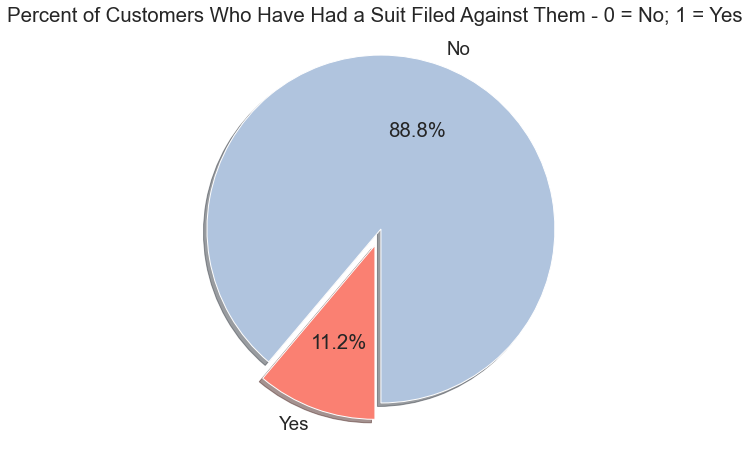

In [4]:
# Data to plot for the % of target variable
sns.set(font_scale = 1.7)
labels =df['suitflag'].value_counts(sort = True).index
sizes = df['suitflag'].value_counts(sort = True)
colors = ["lightsteelblue","salmon"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 8,8
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percent of Customers Who Have Had a Suit Filed Against Them - 0 = No; 1 = Yes')
plt.show()

## Generate Dummy Variables

In [5]:
df.to_csv('capstone_modeling1.csv', index=False)

In [6]:
cols = ['restatementflag']

for ea in range(len(cols)):
    df[cols[ea]] = df[cols[ea]].astype(str)

In [7]:
binary_cols=[]
multi_Value=[]
for col in df.columns:
    if df[col].dtype =='object':
        if df[col].unique().shape[0]==2:
            binary_cols.append(col)
        else:
            multi_Value.append(col)
            
print('Multi-value columns include: ',multi_Value)
print('Binary-value columns include: ',binary_cols)

Multi-value columns include:  ['GIC_Industry', 'GIC_SubIndustry']
Binary-value columns include:  ['suitflag', 'idbflag', 'restatementflag']


In [8]:
for col in df.dtypes[df.dtypes == object].index:
    print(col,'\n', df[col].unique())

GIC_Industry 
 ['Machinery' 'Aeorspace & Defense' 'Industrial Congolomerates'
 'Electrical Equipment' 'Construction & Engineering']
GIC_SubIndustry 
 ['Industrial Machinary' 'Aerospace & Defense' 'Industrial Conglomerates'
 'Electrical Components & Equipment' 'Agricultural & Farm Machinery'
 'Construction & Farm Machinery & Heavy Trucks'
 'Construction & Engineering' 'Heavy Electrical Equipment']
suitflag 
 ['No' 'Yes']
idbflag 
 ['D' 'B']
restatementflag 
 ['1' '0']


In [9]:
# Convert IDBflag, with Foreign_and_Domestic_indicator (1 = yes; 0 = no)
df['Foreign_and_Domestic_indicator'] = df['idbflag'].replace({'D':0, 'B':1})
df.drop(columns='idbflag', inplace=True)

In [10]:
df['GIC_SubIndustry'] = df['GIC_SubIndustry'].replace({r' & ':'_', r' ':'_'}, regex=True)
df['GIC_Industry'] = df['GIC_Industry'].replace({r' & ':'_', r' ':'_'}, regex=True)

In [11]:
# GIC_Industry = pd.get_dummies(df['GIC_Industry'], prefix='GIC_Industry').drop(columns=['GIC_Industry_Aeorspace & Defense'])
# df1 = df.join(GIC_Industry)


GIC_SubIndustry = pd.get_dummies(df['GIC_SubIndustry'], prefix='GIC_SI').drop(columns=['GIC_SI_Aerospace_Defense'])
df1 = df.join(GIC_SubIndustry)

# stko = pd.get_dummies(df['stko'], prefix='stko').drop(columns=['stko_0'])
# df1 = df1.join(stko)

In [12]:
# df1.head(3).T

In [13]:
#Dropping columns due to dummy variable additions
df2 = df1.drop(columns=['GIC_Industry', 
                        'GIC_SubIndustry'
                       ])

In [14]:
df2['restatementflag'] = df2['restatementflag'].astype(int)
df2['suitflag'] = df2['suitflag'].replace({'Yes':1, 'No':0})

# drop restatment flag, as this was used in the prior steps when calculating restatement variances.
df2.drop(columns='restatementflag', inplace=True)

In [15]:
df2

,suitflag,Vol_at_Variance,Vol_capx_Variance,Vol_cogs_Variance,Vol_cshfd_Variance,Vol_dltt_Variance,Vol_dp_Variance,Vol_emp_Variance,Vol_epspi_Variance,Vol_ni_Variance,Vol_ppent_Variance,Vol_sale_Variance,Vol_teq_Variance,Vol_txt_Variance,Vol_wcap_Variance,Vol_xido_Variance,Vol_xint_Variance,Vol_xsga_Variance,Vol_roa_Variance,Vol_roe_Variance,StdDev_at,StdDev_capx,StdDev_cogs,StdDev_cshfd,StdDev_dltt,StdDev_dp,StdDev_emp,StdDev_epspi,StdDev_ni,StdDev_ppent,StdDev_sale,StdDev_teq,StdDev_txt,StdDev_wcap,StdDev_xido,StdDev_xint,StdDev_xsga,StdDev_roa,StdDev_roe,at_PercentChange,capx_PercentChange,cogs_PercentChange,cshfd_PercentChange,dltt_PercentChange,dp_PercentChange,emp_PercentChange,epspi_PercentChange,ni_PercentChange,ppent_PercentChange,sale_PercentChange,teq_PercentChange,txt_PercentChange,wcap_PercentChange,xido_PercentChange,xint_PercentChange,xsga_PercentChange,roa_PercentChange,roe_PercentChange,Foreign_and_Domestic_indicator,GIC_SI_Agricultural_Farm_Machinery,GIC_SI_Construction_Engineering,GIC_SI_Construction_Farm_Machinery_Heavy_Trucks,GIC_SI_Electrical_Components_Equipment,GIC_SI_Heavy_Electrical_Equipment,GIC_SI_Industrial_Conglomerates,GIC_SI_Industrial_Machinary
gvkey,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10008,0,0.05,0.04,0.03,0.01,0.06,0.02,0.06,0.05,0.03,0.00,0.03,0.06,0.06,0.07,0.16,0.04,0.06,0.06,0.01,0.21,0.21,0.26,0.14,0.15,0.26,0.25,0.14,0.33,0.24,0.27,0.28,0.23,0.32,0.05,0.11,0.23,0.10,0.18,0.00,-0.02,-0.11,0.00,0.00,-0.06,0.00,0.00,0.00,-0.10,-0.09,0.00,0.09,0.00,-3.24,0.00,-0.08,0.00,0.00,0,0,0,0,0,0,0,1
10016,0,0.05,0.04,0.51,0.01,0.06,0.76,0.14,0.05,0.04,0.05,0.62,0.06,0.97,0.02,1.84,0.04,0.88,0.06,0.01,0.02,0.37,0.34,0.10,0.12,0.43,1.01,0.39,1.04,0.14,0.45,0.12,0.08,1.42,3.00,0.04,0.67,0.10,0.18,0.00,0.00,-0.10,0.00,0.00,0.10,0.01,0.00,-0.00,0.00,-0.11,0.00,-0.41,0.01,0.00,-0.00,-0.08,-0.00,-0.00,0,0,0,0,0,0,0,1
10030,0,0.05,0.04,0.00,0.01,0.06,0.01,0.06,0.04,0.18,0.09,0.00,0.05,0.03,0.07,0.10,0.05,0.01,0.05,0.00,0.21,0.23,0.28,0.13,0.16,0.26,0.29,0.11,0.35,0.25,0.28,0.32,0.22,0.34,0.19,0.12,0.24,0.10,0.18,0.00,0.00,0.04,0.00,0.00,0.00,0.00,1.67,1.69,0.00,0.00,-0.01,-2.54,0.00,0.00,-0.66,0.04,1.69,1.70,0,0,0,0,0,0,0,1
1004,0,0.05,0.04,0.02,0.01,0.06,0.01,0.06,0.05,0.03,0.04,0.02,0.06,0.02,0.13,0.10,0.04,0.04,0.06,0.01,0.10,0.07,0.04,0.13,0.04,0.27,0.22,0.27,0.31,0.11,0.05,0.24,0.20,0.19,0.16,0.07,0.16,0.10,0.18,-0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,-0.02,0.02,0.00,-0.05,-0.03,-0.00,0.00,0.05,0.00,0.00,0,0,0,0,0,0,0,0
100424,0,0.06,0.04,0.00,0.01,0.06,0.01,0.06,0.05,0.54,0.09,0.00,0.06,0.06,3.00,0.10,0.04,0.08,0.06,0.01,2.31,2.78,2.91,0.12,0.55,2.08,3.00,0.85,3.00,3.00,2.66,3.00,0.11,3.00,0.19,0.03,2.43,0.10,0.18,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,-0.01,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.01,-0.01,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9325,0,0.05,0.04,0.00,0.01,0.06,0.01,0.06,0.05,0.03,0.09,0.00,0.06,0.03,0.06,0.10,0.04,0.00,0.06,0.01,0.22,0.23,0.29,0.13,0.17,0.27,0.28,0.06,0.36,0.25,0.29,0.33,0.23,0.36,0.14,0.12,0.26,0.10,0.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,-0.00,0.00,0.00,0.00,0.00,0,0,0,0,1,0,0,0
9619,0,0.05,0.04,0.00,0.01,0.06,0.01,0.06,0.05,0.03,0.09,0.00,0.06,0.04,0.07,0.13,0.04,0.01,0.06,0.01,0.22,0.23,0.29,0.13,0.17,0.28,0.30,0.14,0.36,0.25,0.30,0.33,0.24,0.38,0.18,0.12,0.27,0.10,0.18,0.00,0.00,-0.10,0.00,0.00,-0.14,0.00,0.00,0.00,0.00,-0.04,0.00,0.70,0.00,0.00,-0.14,-0.06,0.00,0.00,0,0,0,0,1,0,0,0
9698,0,0.05,0.01,0.01,0.01,0.06,0.02,0.06,0.05,0.03,0.05,0.02,0.06,0.03,0.07,0.10,0.04,0.03,0.06,0.01,0.21,0.23,0.28,0.14,0.16,0.24,0.28,0.22,0.36,0.24,0.29,0.32,0.24,0.37,0.18,0.12,0.26,0.10,0.18,0.00,-0.17,-0.16,0.00,0.00,-0.10,0.00,0.00,0.00,-0.12,-0.18,0.00,0.00,0

## Review Data Correlations

In [16]:
# Output any correlated values over 0.67 - isolating high-correlated variables to remove from the analysis
def high_corr_and_check(X):
    corr_matrix = X.corr().abs()
    sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), 
                                     k=1).astype(np.bool))
                      .stack()
                      .sort_values(ascending=False))
    for index, value in sol.items():
        if value > 0.65:
            print(index,value)
            
high_corr_and_check(df2)

('teq_PercentChange', 'wcap_PercentChange') 0.9997807969289167
('StdDev_cogs', 'StdDev_sale') 0.9775983571174197
('Vol_dltt_Variance', 'Vol_xint_Variance') 0.928298342588289
('Vol_cogs_Variance', 'Vol_sale_Variance') 0.9010003305045781
('StdDev_dp', 'StdDev_xsga') 0.8973926356953238
('StdDev_dp', 'StdDev_ppent') 0.8848689803370193
('Vol_sale_Variance', 'Vol_xsga_Variance') 0.8788735733283044
('dltt_PercentChange', 'teq_PercentChange') 0.8699005083400818
('dltt_PercentChange', 'wcap_PercentChange') 0.8697866993248657
('StdDev_at', 'StdDev_dltt') 0.8616806346632134
('Vol_cogs_Variance', 'Vol_txt_Variance') 0.860012915882614
('StdDev_at', 'StdDev_teq') 0.8566063378118832
('wcap_PercentChange', 'xsga_PercentChange') 0.8510094745202446
('teq_PercentChange', 'xsga_PercentChange') 0.8505962805349351
('StdDev_capx', 'StdDev_ppent') 0.8478684926038628
('StdDev_at', 'StdDev_sale') 0.8451041348701588
('StdDev_at', 'StdDev_dp') 0.8443672672092253
('StdDev_sale', 'StdDev_xsga') 0.8406488100084017
(

<b>Action: </b>Remove the highly correlated variables I believe would help the analysis and re-run the high_corr_and_check command.

In [17]:
df2.drop(columns=['StdDev_dp', 'StdDev_at', 'StdDev_cogs', 'Vol_xido_Variance', 'Vol_txt_Variance', 
                  'StdDev_teq', 'StdDev_txt', 'StdDev_capx', 'xsga_PercentChange', 'ppent_PercentChange', 
                  'cshfd_PercentChange', 'roa_PercentChange', 'Vol_xsga_Variance', 'Vol_ppent_Variance', 
                  'Vol_dltt_Variance', 'Vol_dp_Variance', 'Vol_xint_Variance', 'StdDev_sale', 'StdDev_xint', 
                  'StdDev_ppent', 'StdDev_xsga', 'Vol_cogs_Variance', 'StdDev_dltt', 'teq_PercentChange', 
                  'dltt_PercentChange', 'StdDev_ni'], 
         inplace=True)

In [18]:
# Output any correlated values over 0.67 - isolating high-correlated variables to remove from the analysis
def high_corr_and_check(X):
    corr_matrix = X.corr().abs()
    sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), 
                                     k=1).astype(np.bool))
                      .stack()
                      .sort_values(ascending=False))
    for index, value in sol.items():
        if value > 0.65:
            print(index,value)
            
high_corr_and_check(df2)

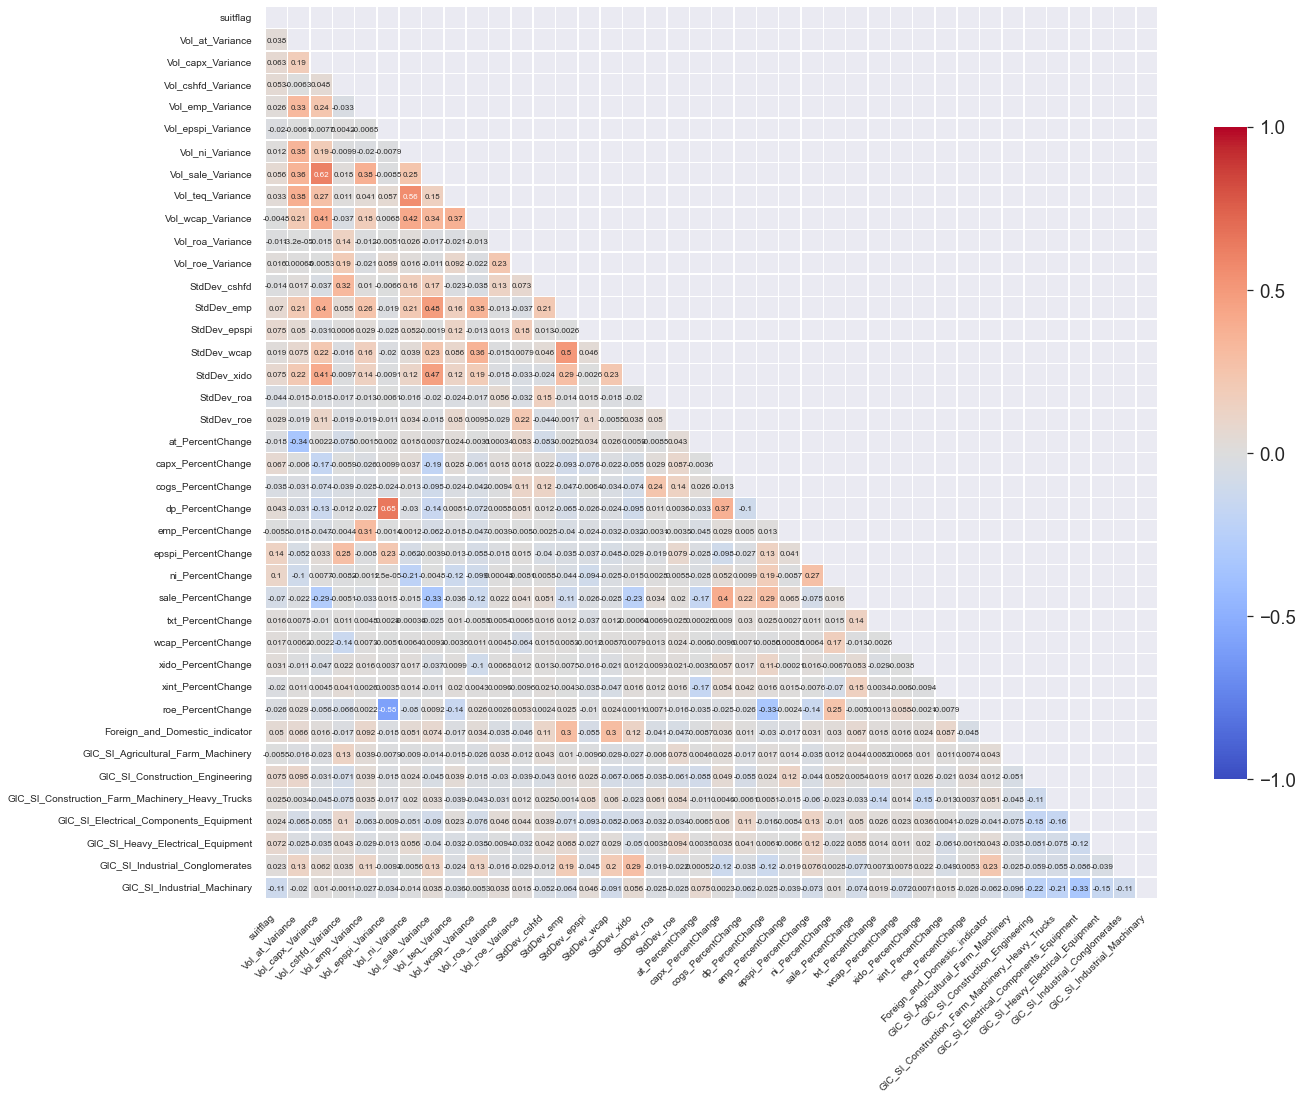

In [19]:
corr_matrix = df2.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(20, 20))
# sns.set(font_scale = .6)

heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .6,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 8})




#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns, rotation = 45, horizontalalignment='right')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

# plt.savefig('corr_plot.png')

In [20]:
#Check to ensure all values are numeric and convert all as necessary
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466 entries, 10008 to 9922
Data columns (total 40 columns):
suitflag                                           466 non-null int64
Vol_at_Variance                                    466 non-null float64
Vol_capx_Variance                                  466 non-null float64
Vol_cshfd_Variance                                 466 non-null float64
Vol_emp_Variance                                   466 non-null float64
Vol_epspi_Variance                                 466 non-null float64
Vol_ni_Variance                                    466 non-null float64
Vol_sale_Variance                                  466 non-null float64
Vol_teq_Variance                                   466 non-null float64
Vol_wcap_Variance                                  466 non-null float64
Vol_roa_Variance                                   466 non-null float64
Vol_roe_Variance                                   466 non-null float64
StdDev_cshfd                

In [21]:
#Review the columns with null values in the dataset
nulls = pd.DataFrame(df2.isnull().sum().sort_values(ascending = False), columns=['Amount'])
nulls = nulls.loc[nulls['Amount'] > 0]
# print('Shape of train dataset:', train.shape, '\nMissing values for train dataset below:\n', nulls)
nulls = pd.DataFrame(nulls.loc[nulls['Amount'] > 0])
# print('Shape of train dataset:', train.shape, '\nMissing values for train dataset below:\n', nulls)
nulls.index.name='Columns With Missing Values'
nulls

,Amount
Columns With Missing Values,


In [22]:
df2.fillna(0, inplace=True)

In [23]:
#Review the columns with null values in the dataset
nulls = pd.DataFrame(df2.isnull().sum().sort_values(ascending = False), columns=['Amount'])
nulls = nulls.loc[nulls['Amount'] > 0]
# print('Shape of train dataset:', train.shape, '\nMissing values for train dataset below:\n', nulls)
nulls = pd.DataFrame(nulls.loc[nulls['Amount'] > 0])
# print('Shape of train dataset:', train.shape, '\nMissing values for train dataset below:\n', nulls)
nulls.index.name='Columns With Missing Values'
nulls

,Amount
Columns With Missing Values,


In [24]:
df2.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
suitflag,466.00,0.11,0.32,0.00,0.00,0.00,0.00,1.00
Vol_at_Variance,466.00,0.09,0.25,0.01,0.05,0.05,0.05,3.00
Vol_capx_Variance,466.00,0.09,0.30,0.01,0.04,0.04,0.04,3.00
Vol_cshfd_Variance,466.00,0.12,0.40,0.00,0.01,0.01,0.01,3.00
Vol_emp_Variance,466.00,0.10,0.30,0.02,0.06,0.06,0.06,3.00
Vol_epspi_Variance,466.00,0.05,0.14,0.01,0.05,0.05,0.05,3.00
Vol_ni_Variance,466.00,0.08,0.31,0.00,0.03,0.03,0.03,3.00
Vol_sale_Variance,466.00,0.06,0.32,0.00,0.00,0.00,0.00,3.00
Vol_teq_Variance,466.00,0.09,0.26,0.00,0.06,0.06,0.06,3.00
Vol_wcap_Variance,466.00,0.12,0.33,0.00,0.07,0.07,0.07,3.00


## Split the Dataset

In [25]:
x = df2.drop(columns=['suitflag'])
y = df2[['suitflag']] 

#split data by 80/20
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

#add SMOTE
sm = SMOTE(random_state = 30)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [26]:
x[x.index.isin(['3580'])]

,Vol_at_Variance,Vol_capx_Variance,Vol_cshfd_Variance,Vol_emp_Variance,Vol_epspi_Variance,Vol_ni_Variance,Vol_sale_Variance,Vol_teq_Variance,Vol_wcap_Variance,Vol_roa_Variance,Vol_roe_Variance,StdDev_cshfd,StdDev_emp,StdDev_epspi,StdDev_wcap,StdDev_xido,StdDev_roa,StdDev_roe,at_PercentChange,capx_PercentChange,cogs_PercentChange,dp_PercentChange,emp_PercentChange,epspi_PercentChange,ni_PercentChange,sale_PercentChange,txt_PercentChange,wcap_PercentChange,xido_PercentChange,xint_PercentChange,roe_PercentChange,Foreign_and_Domestic_indicator,GIC_SI_Agricultural_Farm_Machinery,GIC_SI_Construction_Engineering,GIC_SI_Construction_Farm_Machinery_Heavy_Trucks,GIC_SI_Electrical_Components_Equipment,GIC_SI_Heavy_Electrical_Equipment,GIC_SI_Industrial_Conglomerates,GIC_SI_Industrial_Machinary
gvkey,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3580,0.05,0.04,0.01,0.06,0.05,0.03,0.03,0.06,0.07,0.06,0.01,0.13,0.20,0.33,0.11,0.00,0.10,0.17,0.00,0.00,-0.03,-0.05,0.00,0.00,0.00,-0.02,0.33,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,1


In [27]:
test_train_summary(X_train, y_train)


Training Dataset - Before Synthetic Minority Oversampling Technique (SMOTE): 
   Number  of Companies sued:                   39
   Number of Companies not sued:               287
   Total Companies:                            326
   Percent of Companies who Filed Suit:        12%
   Columns and Row count Review: 
      Column count:                             39
      Column-to-Row ratio:                     12%

Training Dataset - After SMOTE: 
   Training Dataset - Overview: 
   Number  of Companies sued (Increase):       287
   Number of Companies not sued:               287
   Percent of Companies who Filed Suit:        50%
   Columns and Row count Review: 
      Column count:                             39
      Column-to-Row ratio:                     12%

Test Dataset - Overview: 
   Number  of Companies sued:                   13
   Number of Companies not sued:               127
   Total Companies:                            140
   Percent of Companies who Filed Suit:      

# Model Runs

## Training the Models

### Logistic Regression

Summary of Modeled Results: 
   General Accuracy:   90.0%
   ROC AUC Score:      56.4%
   Precision Score:   100.0%
   Recall Score:       12.8%
   F1 Score:           22.7%



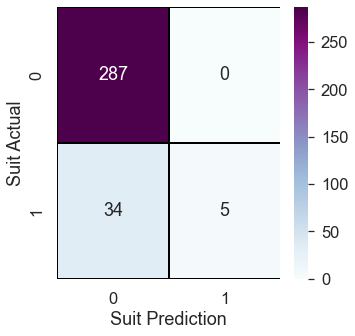

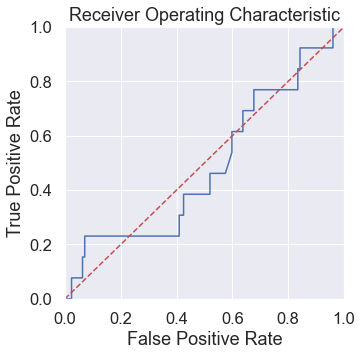

In [28]:
logistic_regression = LogisticRegression(n_jobs=-1, random_state=15).fit(X_train, y_train)

model_pred_train = logistic_regression.predict(X_train)
model_pred_test = logistic_regression.predict(X_test)

res_1 = cross_val_score(logistic_regression, X_train, y_train, scoring = 'accuracy', cv = 10)

acc_logistic_regression, prec_logistic_regression, recall_logistic_regression, f1_logistic_regression = model_run(X_train, y_train, logistic_regression, 'train')

### Logistic Regression - with SMOTE

Summary of Modeled Results: 
   General Accuracy:   66.4%
   ROC AUC Score:      77.2%
   Precision Score:    76.0%
   Recall Score:       79.4%
   F1 Score:           77.7%



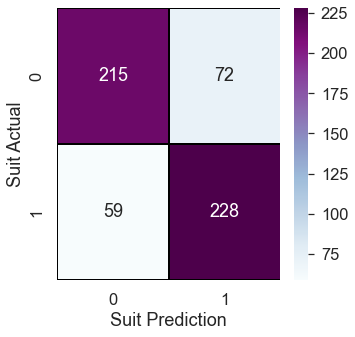

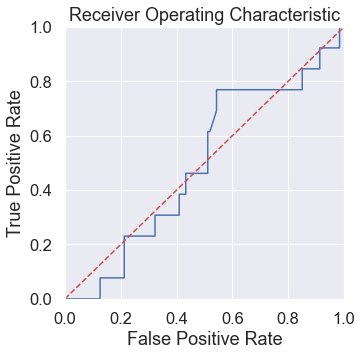

In [29]:
logistic_regression_sm = LogisticRegression(n_jobs=-1, random_state=15).fit(X_train_smote, y_train_smote)

model_pred_train = logistic_regression_sm.predict(X_train_smote)
model_pred_test = logistic_regression_sm.predict(X_test)

res_2 = cross_val_score(logistic_regression_sm, X_train_smote, y_train_smote, scoring = 'accuracy', cv = 10)

acc_logistic_regression_sm, prec_logistic_regression_sm, recall_logistic_regression_sm, f1_logistic_regression_sm = model_run(X_train_smote, y_train_smote, logistic_regression_sm, 'train')

### Logistic Regression - with SMOTE and hyper paramters tuned

In [30]:
LR = LogisticRegression(n_jobs=-1)

parameters = {"C":np.logspace(-3,3,7), 'penalty': ['l1', 'l2'], 'solver' : ['liblinear', 'sag', 'saga'], 'random_state':(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15)}


grid_LR = GridSearchCV(estimator=LR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_LR.fit(X_train_smote, y_train_smote)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_LR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_LR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_LR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 LogisticRegression(C=1000.0, n_jobs=-1, random_state=0, solver='liblinear')

 The best score across ALL searched params:
 0.7682926829268293

 The best parameters across ALL searched params:
 {'C': 1000.0, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear'}


Summary of Modeled Results: 
   General Accuracy:   65.0%
   ROC AUC Score:      79.8%
   Precision Score:    78.6%
   Recall Score:       81.9%
   F1 Score:           80.2%



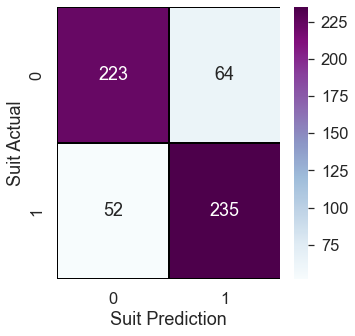

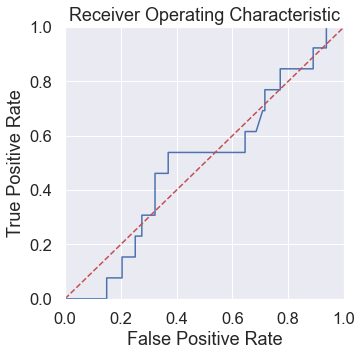

In [31]:
logistic_regression_sm_hp = LogisticRegression(C=1000.0, penalty='l1', random_state=0, solver='liblinear', n_jobs=-1).fit(X_train_smote, y_train_smote)

model_pred_train = logistic_regression_sm_hp.predict(X_train_smote)
model_pred_test = logistic_regression_sm_hp.predict(X_test)

res_3 = cross_val_score(logistic_regression_sm_hp, X_train_smote, y_train_smote, scoring = 'accuracy', cv = 10)

acc_logistic_regression_sm_hp, prec_logistic_regression_sm_hp, recall_logistic_regression_sm_hp, f1_logistic_regression_sm_hp = model_run(X_train_smote, y_train_smote, logistic_regression_sm_hp, 'train')

## Training - Model Evaluation

In [32]:
# Create a list which contains classifiers 
classifiers = []
classifiers.append(logistic_regression)
classifiers.append(logistic_regression_sm)
classifiers.append(logistic_regression_sm_hp)
print('Number of Classifiers: ',len(classifiers))

# Number of Cross Validations
cv = 10
print('Number of Cross Validations: ', cv, '\n','-'*40)

# Create a list which contains cross validation results for each classifier
cv_results = []
cv_results.append(res_1)
cv_results.append(res_2)
cv_results.append(res_3)

# for classifier in classifiers:
#     cv_results.append(cross_val_score(classifier, X_train, y_train, scoring = 'accuracy', cv = 10))
    
# Mean and standard deviation of cross validation results for each classifier  
cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(round(cv_result.mean()*100,2))
    cv_std.append(round(cv_result.std(),3))

algos = ['Logistic Regression - Initial Run',
         'Logistic Regression - With SMOTE',
         'Logistic Regression - With SMOTE and Hyperparamters Tuned',
        ]

acc_scores = [acc_logistic_regression,
              acc_logistic_regression_sm,
              acc_logistic_regression_sm_hp,
             ]

prec_scores = [prec_logistic_regression,
              prec_logistic_regression_sm,
              prec_logistic_regression_sm_hp,
              ]

recall_scores = [recall_logistic_regression,
                 recall_logistic_regression_sm,
                 recall_logistic_regression_sm_hp,
                ]

f1_scores = [f1_logistic_regression,
             f1_logistic_regression_sm,
             f1_logistic_regression_sm_hp,
            ]

    
cv_res = pd.DataFrame({'Algorithm': algos,
                       'Initial Accuracy Scores': acc_scores,
                       'Cross Validation Mean': cv_mean, 
                       'Cross Validation Std': cv_std,
                       'Precision Score': prec_scores,
                       'Recall Scores': recall_scores,
                       'F1 Scores': f1_scores
                       })


cv_res.sort_values(by = 'F1 Scores', ascending = False).set_index('Algorithm')

Number of Classifiers:  3
Number of Cross Validations:  10 
 ----------------------------------------


,Initial Accuracy Scores,Cross Validation Mean,Cross Validation Std,Precision Score,Recall Scores,F1 Scores
Algorithm,,,,,,
Logistic Regression - With SMOTE and Hyperparamters Tuned,65.00,75.60,0.07,78.60,81.88,80.20
Logistic Regression - With SMOTE,66.43,73.51,0.08,76.00,79.44,77.68
Logistic Regression - Initial Run,90.00,85.89,0.03,100.00,12.82,22.73


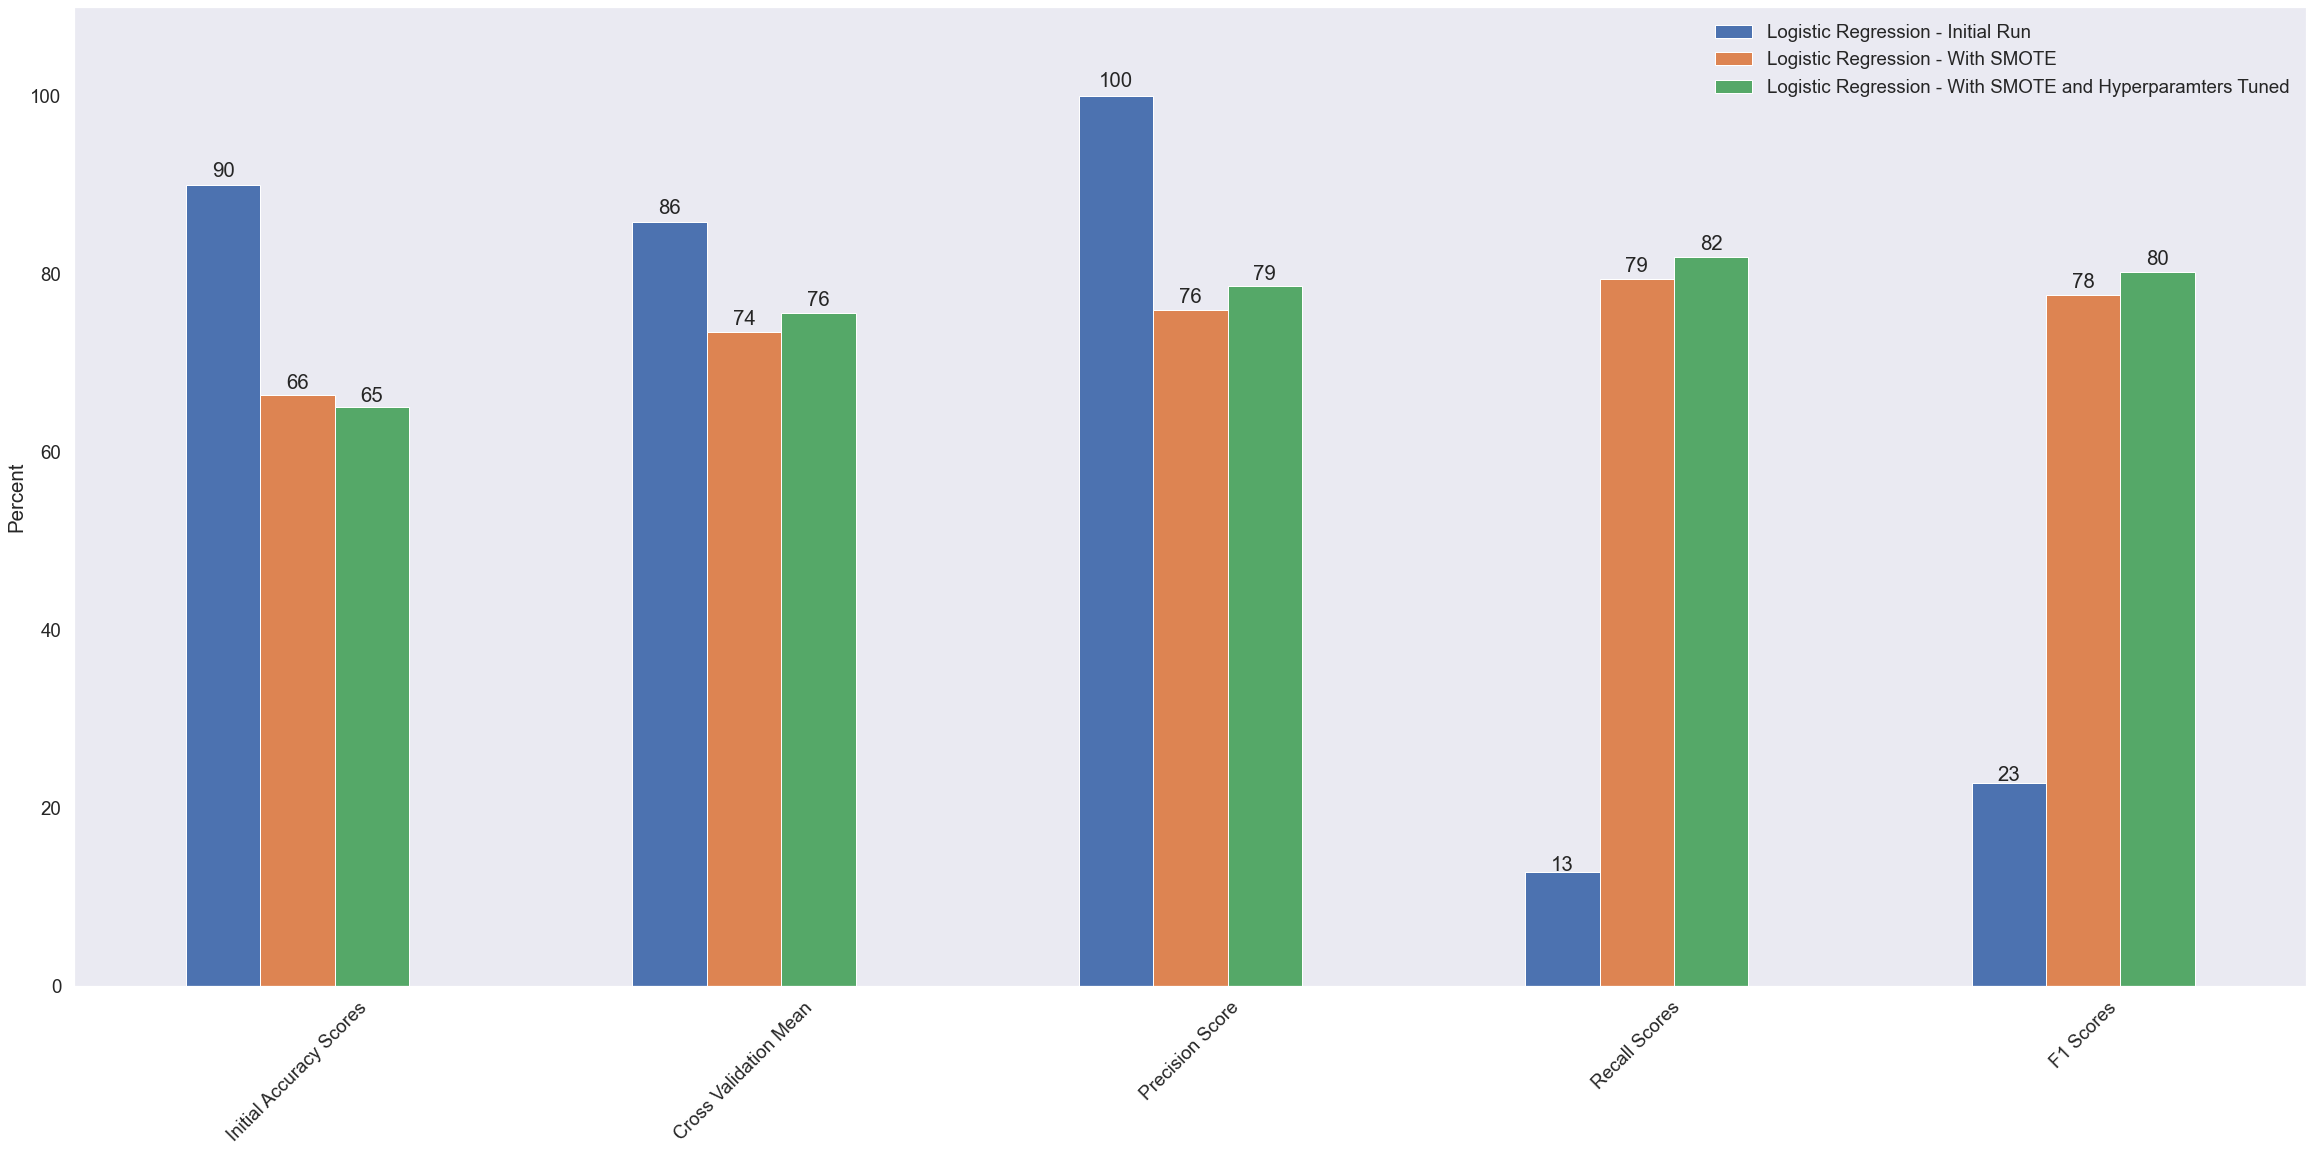

In [33]:
cv_res1 = cv_res.drop(columns='Cross Validation Std').set_index('Algorithm').T
sns.set(font_scale = 1.7)
fig, ax = plt.subplots(figsize=(40,18))
cv_res1.plot(kind='bar', ax=ax)
plt.xticks(rotation = 45)
plt.ylabel('Percent')
plt.legend(loc='top right')
show_values(ax)
plt.ylim(0, 110)
ax.grid();

## Testing the Models

### Logistic Regression

Summary of Modeled Results: 
   General Accuracy:   90.0%
   ROC AUC Score:      56.4%
   Precision Score:     0.0%
   Recall Score:        0.0%
   F1 Score:            0.0%



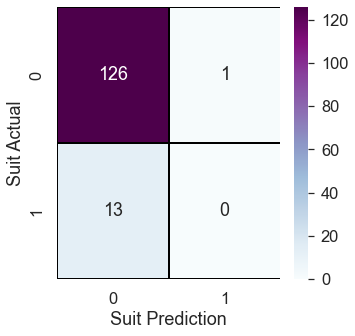

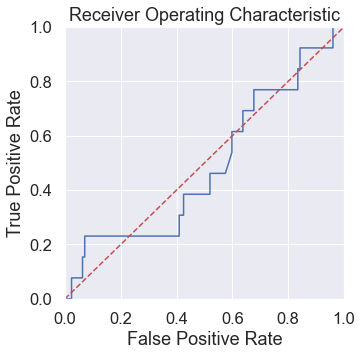

In [34]:
logistic_regression = LogisticRegression(n_jobs=-1, random_state=15).fit(X_train, y_train)

model_pred_train = logistic_regression.predict(X_train)
model_pred_test = logistic_regression.predict(X_test)

res_1 = cross_val_score(logistic_regression, X_train, y_train, scoring = 'accuracy', cv = 10)

acc_logistic_regression, prec_logistic_regression, recall_logistic_regression, f1_logistic_regression = model_run(X_train, y_train, logistic_regression, 'test')

### Logistic Regression - with SMOTE

Summary of Modeled Results: 
   General Accuracy:   66.4%
   ROC AUC Score:      77.2%
   Precision Score:     7.5%
   Recall Score:       23.1%
   F1 Score:           11.3%



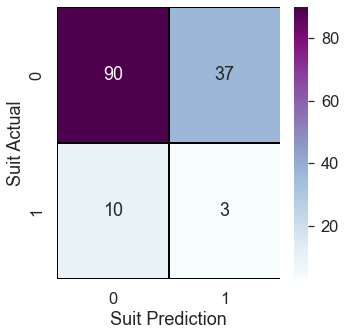

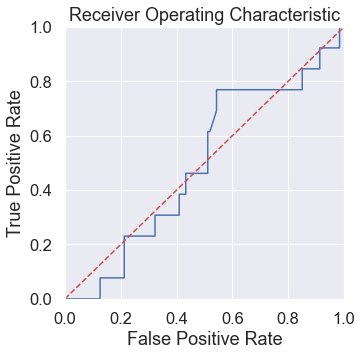

In [35]:
logistic_regression_sm = LogisticRegression(n_jobs=-1, random_state=15).fit(X_train_smote, y_train_smote)

model_pred_train = logistic_regression_sm.predict(X_train_smote)
model_pred_test = logistic_regression_sm.predict(X_test)

res_2 = cross_val_score(logistic_regression_sm, X_train_smote, y_train_smote, scoring = 'accuracy', cv = 10)

acc_logistic_regression_sm, prec_logistic_regression_sm, recall_logistic_regression_sm, f1_logistic_regression_sm = model_run(X_train_smote, y_train_smote, logistic_regression_sm, 'test')

### Logistic Regression - with SMOTE and hyper paramters tuned

In [36]:
LR = LogisticRegression(n_jobs=-1)

parameters = {"C":np.logspace(-3,3,7), 'penalty': ['l1', 'l2'], 'solver' : ['liblinear', 'sag', 'saga'], 'random_state':(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15)}


grid_LR = GridSearchCV(estimator=LR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_LR.fit(X_train_smote, y_train_smote)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_LR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_LR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_LR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 LogisticRegression(C=1000.0, n_jobs=-1, random_state=0, solver='liblinear')

 The best score across ALL searched params:
 0.7682926829268293

 The best parameters across ALL searched params:
 {'C': 1000.0, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear'}


Summary of Modeled Results: 
   General Accuracy:   65.0%
   ROC AUC Score:      79.8%
   Precision Score:     9.1%
   Recall Score:       30.8%
   F1 Score:           14.0%



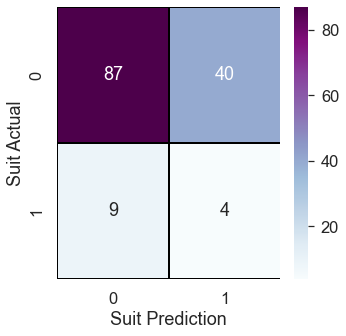

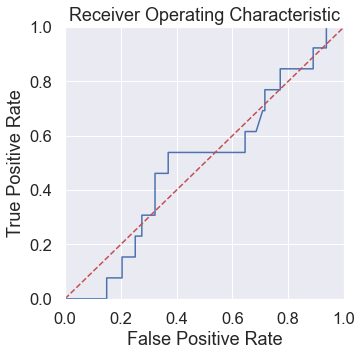

In [37]:
logistic_regression_sm_hp = LogisticRegression(C=1000.0, penalty='l1', random_state=0, solver='liblinear', n_jobs=-1).fit(X_train_smote, y_train_smote)

model_pred_train = logistic_regression_sm_hp.predict(X_train_smote)
model_pred_test = logistic_regression_sm_hp.predict(X_test)

res_3 = cross_val_score(logistic_regression_sm_hp, X_train_smote, y_train_smote, scoring = 'accuracy', cv = 10)

acc_logistic_regression_sm_hp, prec_logistic_regression_sm_hp, recall_logistic_regression_sm_hp, f1_logistic_regression_sm_hp = model_run(X_train_smote, y_train_smote, logistic_regression_sm_hp, 'test')

## Testing - Model Evaluation

In [38]:
# Create a list which contains classifiers 
classifiers = []
classifiers.append(logistic_regression)
classifiers.append(logistic_regression_sm)
classifiers.append(logistic_regression_sm_hp)
print('Number of Classifiers: ',len(classifiers))

# Number of Cross Validations
cv = 10
print('Number of Cross Validations: ', cv, '\n','-'*40)

# Create a list which contains cross validation results for each classifier
cv_results = []
cv_results.append(res_1)
cv_results.append(res_2)
cv_results.append(res_3)

# for classifier in classifiers:
#     cv_results.append(cross_val_score(classifier, X_train, y_train, scoring = 'accuracy', cv = 10))
    
# Mean and standard deviation of cross validation results for each classifier  
cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(round(cv_result.mean()*100,2))
    cv_std.append(round(cv_result.std(),3))

algos = ['Logistic Regression - Initial Run',
         'Logistic Regression - With SMOTE',
         'Logistic Regression - With SMOTE and Hyperparamters Tuned',
        ]

acc_scores = [acc_logistic_regression,
              acc_logistic_regression_sm,
              acc_logistic_regression_sm_hp,
             ]

prec_scores = [prec_logistic_regression,
              prec_logistic_regression_sm,
              prec_logistic_regression_sm_hp,
              ]

recall_scores = [recall_logistic_regression,
                 recall_logistic_regression_sm,
                 recall_logistic_regression_sm_hp,
                ]

f1_scores = [f1_logistic_regression,
             f1_logistic_regression_sm,
             f1_logistic_regression_sm_hp,
            ]

    
cv_res = pd.DataFrame({'Algorithm': algos,
                       'Initial Accuracy Scores': acc_scores,
                       'Cross Validation Mean': cv_mean, 
                       'Cross Validation Std': cv_std,
                       'Precision Score': prec_scores,
                       'Recall Scores': recall_scores,
                       'F1 Scores': f1_scores
                       })


cv_res.sort_values(by = 'F1 Scores', ascending = False).set_index('Algorithm')

Number of Classifiers:  3
Number of Cross Validations:  10 
 ----------------------------------------


,Initial Accuracy Scores,Cross Validation Mean,Cross Validation Std,Precision Score,Recall Scores,F1 Scores
Algorithm,,,,,,
Logistic Regression - With SMOTE and Hyperparamters Tuned,65.00,75.60,0.07,9.09,30.77,14.04
Logistic Regression - With SMOTE,66.43,73.51,0.08,7.50,23.08,11.32
Logistic Regression - Initial Run,90.00,85.89,0.03,0.00,0.00,0.00


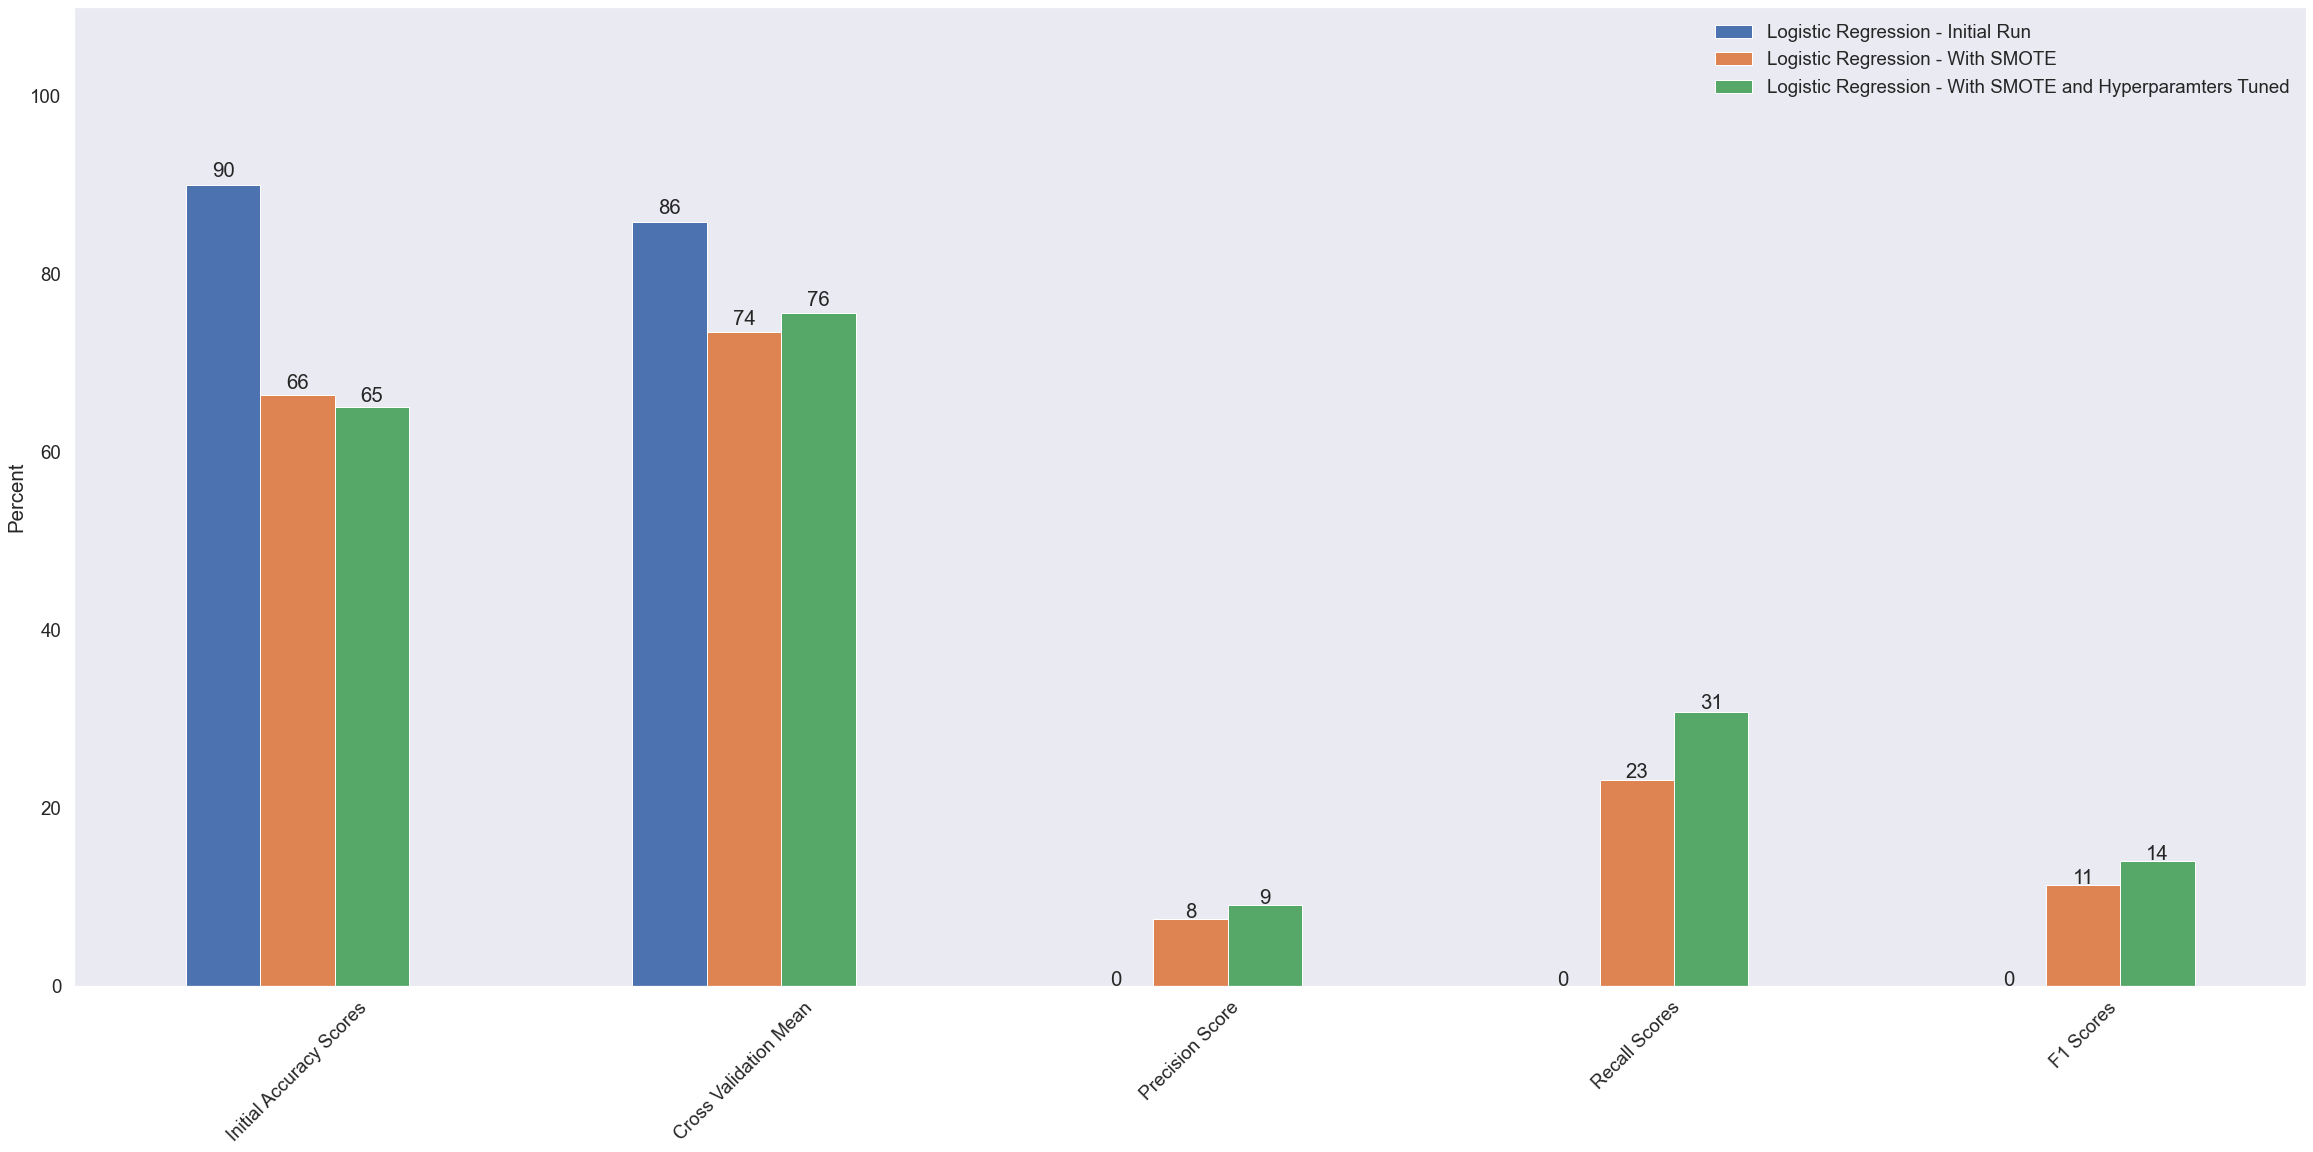

In [39]:
cv_res1 = cv_res.drop(columns='Cross Validation Std').set_index('Algorithm').T
sns.set(font_scale = 1.7)
fig, ax = plt.subplots(figsize=(40,18))
cv_res1.plot(kind='bar', ax=ax)
plt.xticks(rotation = 45)
plt.ylabel('Percent')
plt.legend(loc='top right')
show_values(ax)
plt.ylim(0, 110)
ax.grid();

## Visualize F1 Scores to Identify the Best Model

Text(0.5, 1.0, 'F1 Scores')

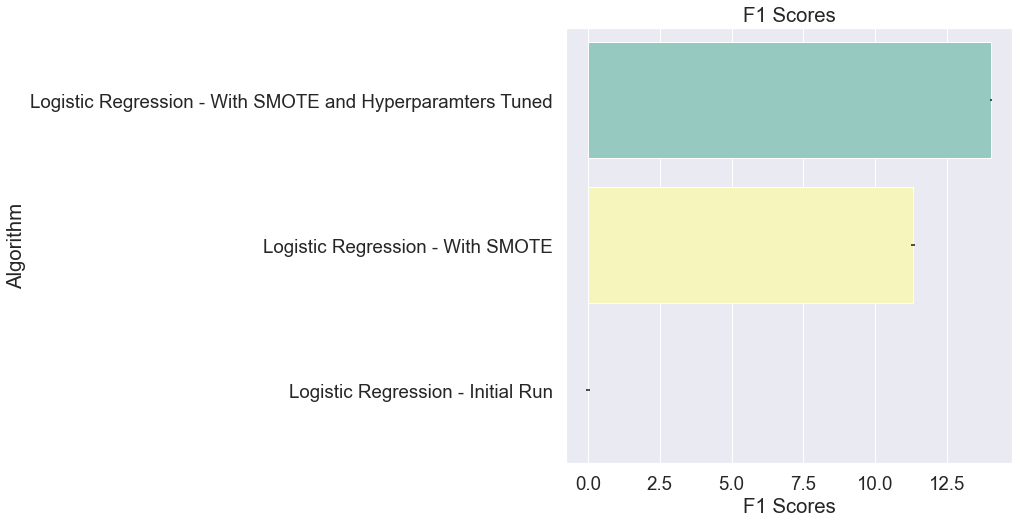

In [40]:
sns.barplot('F1 Scores', 
            'Algorithm', 
            data = cv_res, 
            order = cv_res.sort_values(by = 'F1 Scores', 
                                       ascending = False)['Algorithm'], 
            palette = 'Set3', 
            **{'xerr': cv_std})

plt.ylabel('Algorithm')
plt.title('F1 Scores')

## Receiver Operating Characteristic Curve

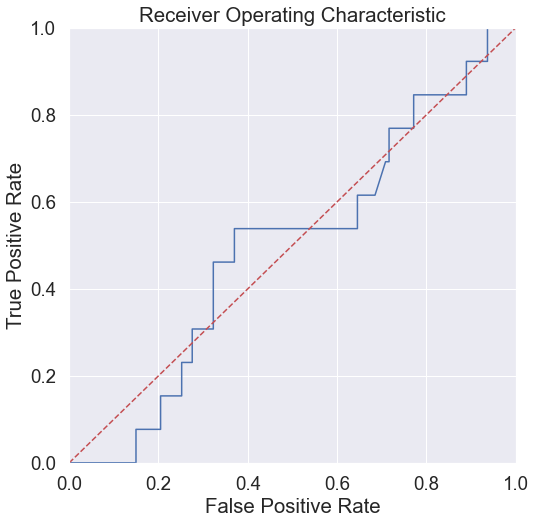

In [41]:
probs = logistic_regression_sm_hp.predict_proba(X_test)
# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_test, probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Combine Prediction Results to Test Dataset

In [ ]:
x

In [ ]:
Y_pred = logistic_regression_sm_hp.predict_proba(x)[:, 1]
# Y_pred

In [ ]:
df.reset_index(inplace=True)
df.reset_index(inplace=True)

In [ ]:
df.set_index('gvkey', inplace=True)

In [ ]:
print('The number of companies in this prediction is: ' ,len(Y_pred))

In [ ]:
submit = pd.DataFrame({'index': df['index'], 'suit_pred': Y_pred})
submit = submit[['suit_pred']]
submit

In [ ]:
df = df.join(submit)
df.drop(columns='index', inplace=True)
df

In [ ]:
df['suitflag']

In [ ]:
def custom_round(x, base=5):
    return int(base * round(float(x)/base))

In [ ]:
df['Prediction_Score'] = df['suit_pred']*100
df['Prediction_Score'] = df['Prediction_Score'].apply(lambda x: custom_round(x, base=5))

In [ ]:
# df['Prediction_Score'] = round(df['suit_pred']*100, 2)
pd.value_counts(df['Prediction_Score'], dropna=False)

In [ ]:
df.hist('suit_pred', bins=10)

In [ ]:
cv_res1 = cv_res.drop(columns='Cross Validation Std').set_index('Algorithm').T
sns.set(font_scale = 1.8)
fig, ax = plt.subplots(figsize=(24,8))
cv_res1.plot(kind='bar', ax=ax)
plt.xticks(rotation = 45)
plt.ylabel('Percent')
plt.legend(loc='top right')
show_values(ax)
plt.ylim(0, 100)
ax.grid();

In [ ]:
# plt.figure(figsize = (25,10))
# sns.set(font_scale = 2.5)


# var = df['Prediction_Score']
# ax = sns.countplot(x = var,
#                    data = df, )

# show_values(ax)
# plt.ylim(0, 150)

# plt.ylabel('Company Count')
# plt.xlabel('Prediction Scores \n(in %)')
# # plt.title('Company Count by Prediction Score')
# plt.xticks(rotation = 0)

# Model Interpretation

In [ ]:
model  = pd.DataFrame({"Features": X_train_sm.columns,"Coefficient":res.params.values})
model["Odds_Ratio"] = model["Coefficient"].apply(lambda x: np.exp(x))
model[["Coefficient","Odds_Ratio"]] = model[["Coefficient","Odds_Ratio"]].apply(lambda x: round(x,2))
model["Perc_Impact"] = model["Odds_Ratio"].apply(lambda x: (x-1)*100)
model = model.loc[model['Features']!='const'].sort_values(by='Odds_Ratio', ascending=False)
model

In [ ]:
x[x.index.isin(['3580'])]

In [ ]:
logistic_regression_sm_hp.predict_proba(x[x.index.isin(['3580'])])[:,1]

In [ ]:
logistic_regression_sm.predict_proba(x[x.index.isin(['3580'])])[:,1]

In [ ]:
logistic_regression.predict_proba(x[x.index.isin(['3580'])])[:,1]

In [ ]:
coef = pd.DataFrame(logistic_regression.coef_[0],index=x.columns, columns=['Coef']).sort_values('Coef',ascending=False)
coef[abs(coef['Coef'])>.2]

In [ ]:
col_to_keep = list(coef[coef['Coef']>0.00].index)
X_train_smote2 = X_train_smote[col_to_keep]
X_test2 = X_test[col_to_keep]

In [ ]:
model_run(X_train_smote2, X_test2, y_train_smote, y_test, DecisionTreeClassifier, 'test')

In [ ]:
# Model Results WITH SMOTE
logistic_regression2, acc_logistic_regression2, prec_logistic_regression2, recall_logistic_regression2, f1_logistic_regression2 = model_run(X_train_smote2, X_test2, y_train_smote, y_test, LogisticRegression, 'test')
#  = model_run(X_train_smote, X_test, y_train_smote, y_test, 'test')

In [ ]:
model_run(X_train_smote2, X_test2, y_train_smote, y_test, RandomForestClassifier, 'test')

In [ ]:
def visualize_features(model, feature_names):
    
    print(feature_imp)

In [ ]:
visualize_features(logistic_regression, x.columns)

In [ ]:
# folder_loc = '../01_data/02_modified/'
# X_train.to_csv(folder_loc+'X_train.csv')
# X_test.to_csv(folder_loc+'X_test.csv')
# y_train.to_csv(folder_loc+'y_train.csv')
# y_test.to_csv(folder_loc+'y_test.csv')
# X_train_smote.to_csv(folder_loc+'X_train_smote.csv', index=False)
# y_train_smote.to_csv(folder_loc+'y_train_smote.csv', index=False)

# Finish